# 📊 Resultados del Proyecto Clustering Jerárquico


## 🎯 Introducción

Este proyecto tiene como objetivo aplicar **Clustering Jerárquico Aglomerativo** 
usando métodos **Ward** y **Average** sobre datasets clásicos (*Iris* y *Wine*), 
y comparar los resultados mediante visualizaciones de **PCA** y **t-SNE**.

Se busca:
- Explorar la estructura oculta de los datos.
- Visualizar la formación de clusters usando PCA y t-SNE.
- Comparar dendrogramas con distintos métodos de linkage.
- Analizar diferencias entre los métodos y la consistencia de los clusters obtenidos.


In [2]:
!pip install scikit-learn matplotlib seaborn pandas


In [4]:

# ✅ Configuración del entorno
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
# Fijar el root del proyecto directamente
project_root = Path("/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase1MarcoParra")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


print("project_root:", project_root)


project_root: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase1MarcoParra


In [6]:
from sklearn.decomposition import PCA
from src.utils import cargar_dataset
from src.modelos import clustering_jerarquico
from src.visualizador import graficar_dendrograma, graficar_pca_2d, graficar_pca_3d, graficar_tsne
from src.evaluador import guardar_etiquetas
import os

# 🚀 Ejecutar pipeline principal
print("🔹 Iniciando pipeline Clustering Jerárquico...")

X, y = cargar_dataset("iris")
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)


# PCA 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
graficar_pca_2d(X_pca_2d, y, title="PCA 2D - Clustering Jerárquico")

# PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
graficar_pca_3d(X_pca_3d, y, title="PCA 3D - Clustering Jerárquico")

for metodo in ["ward", "average"]:
    for n_clusters in [2, 3]:
        print(f"📌 {metodo.upper()} con {n_clusters} clusters")

        Z, etiquetas = clustering_jerarquico(X, metodo=metodo, n_clusters=n_clusters)

        graficar_dendrograma(Z, f"Dendrograma - {metodo} ({n_clusters} clusters)",
                                f"{output_dir}/dendrograma_{metodo}_{n_clusters}.png")


        graficar_tsne(X, etiquetas, f"t-SNE - {metodo} ({n_clusters} clusters)",
                        f"{output_dir}/tsne_{metodo}_{n_clusters}.png")

        guardar_etiquetas(X, etiquetas, metodo, n_clusters, output_dir)

🔹 Iniciando pipeline Clustering Jerárquico...
📥 Cargando dataset 'iris'...
🔍 Verificando NaN iniciales: 0
✅ Verificación final: 0 NaNs restantes
⚠️ Filas eliminadas por outliers: 4
✅ Dataset cargado completo: 146 filas, 4 features
📌 WARD con 2 clusters
📌 WARD con 3 clusters
📌 AVERAGE con 2 clusters
📌 AVERAGE con 3 clusters


## 📊 Visualizaciones de Resultados

project_root: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase1MarcoParra
⚠️ Imagen no encontrada: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase1MarcoParra/outputs/pca_varianza_explicada.png
Mostrando: pca_2d.png


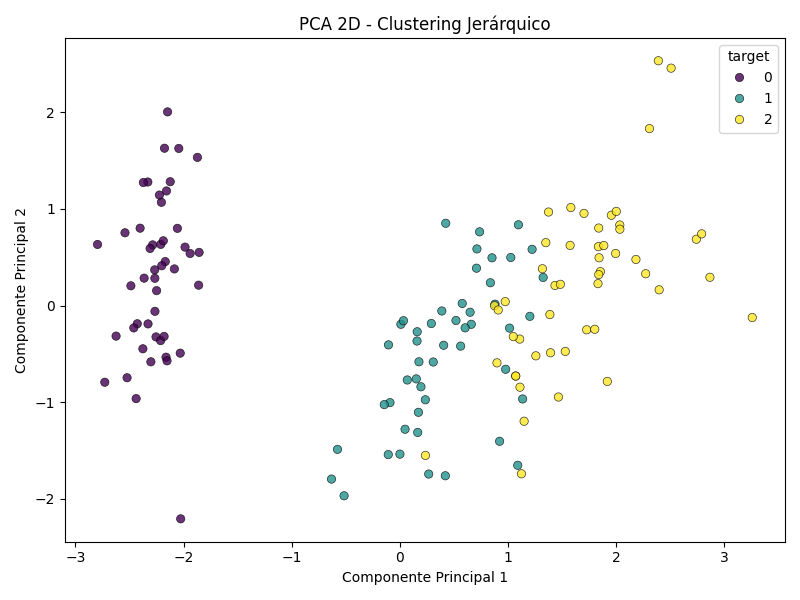

Mostrando: pca_3d.png


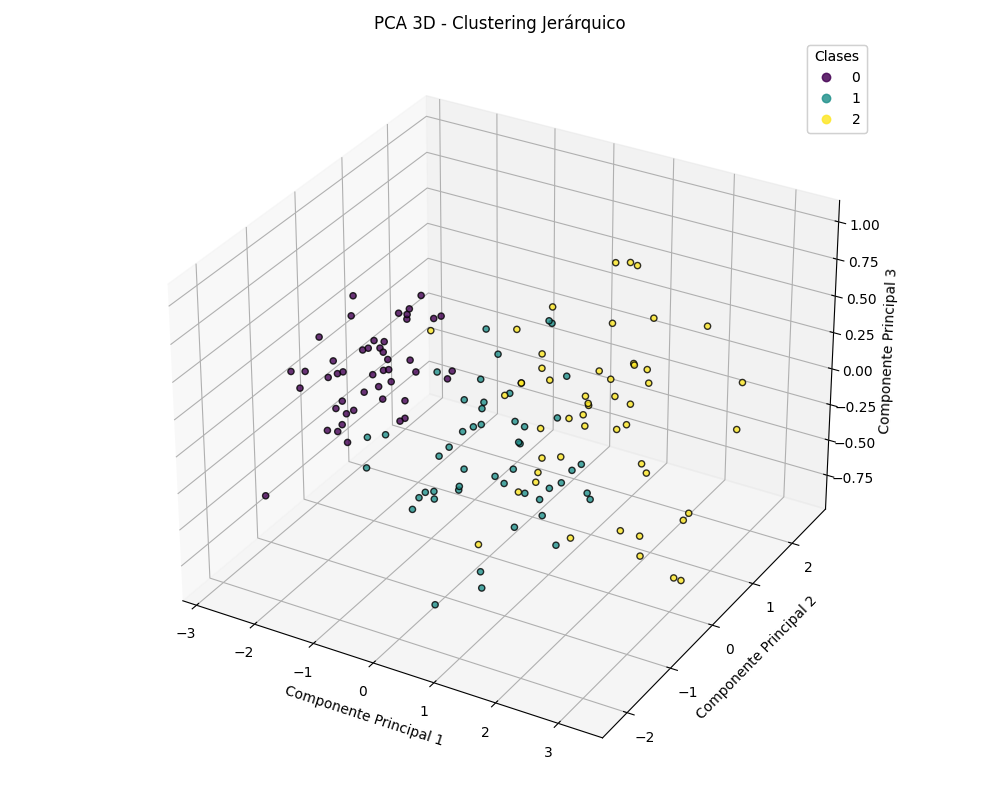

Mostrando: tsne_average_2.png


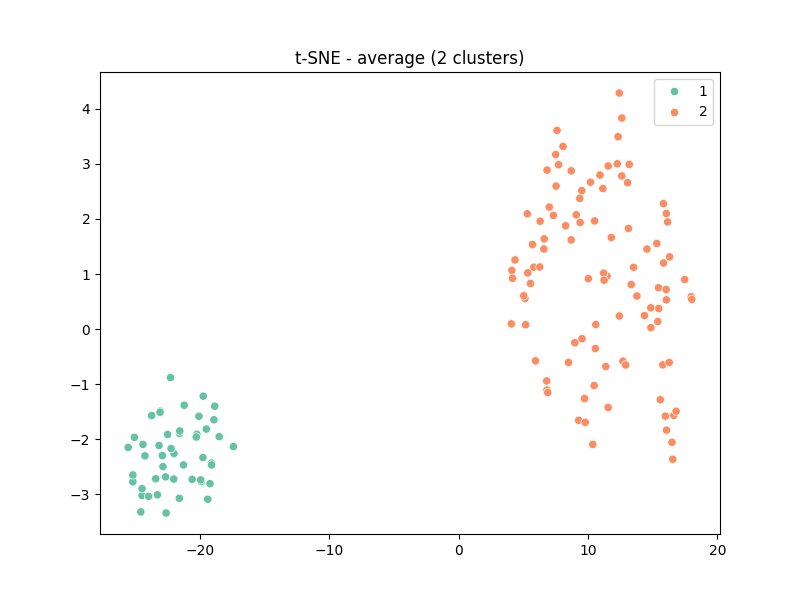

Mostrando: tsne_average_3.png


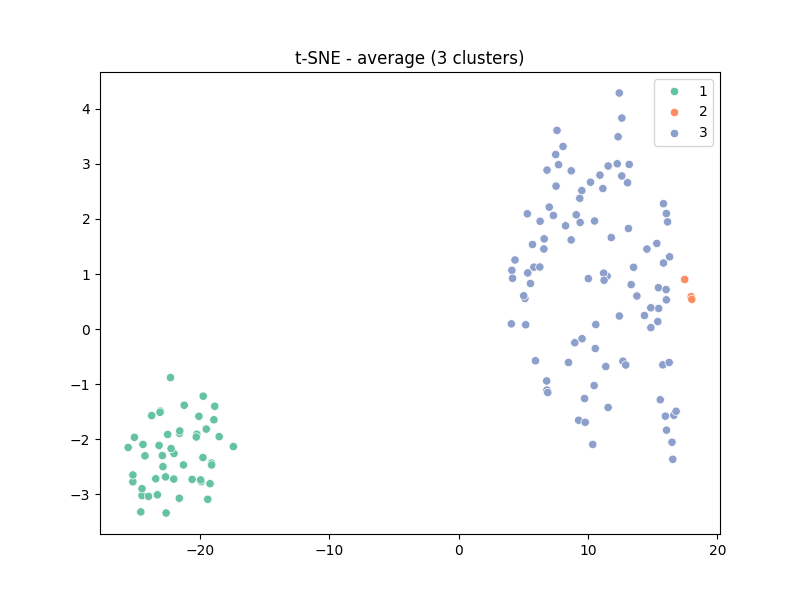

Mostrando: tsne_ward_2.png


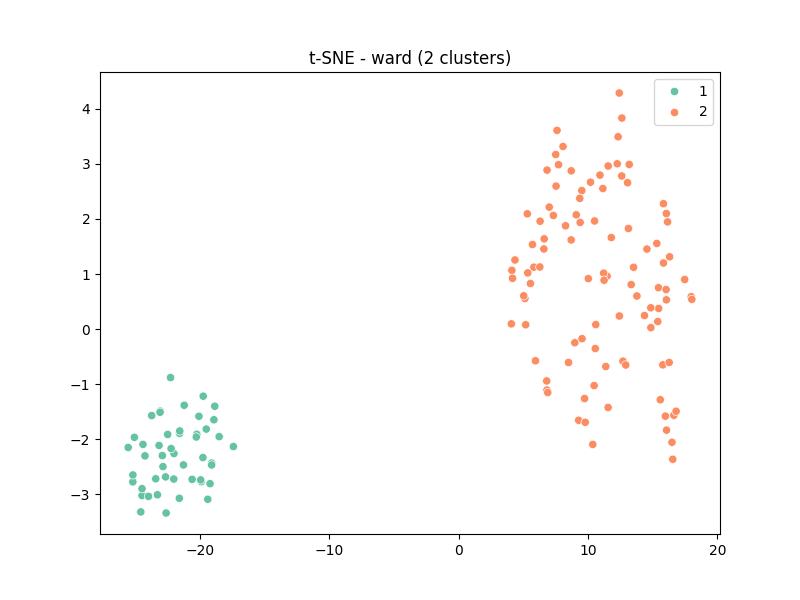

Mostrando: tsne_ward_3.png


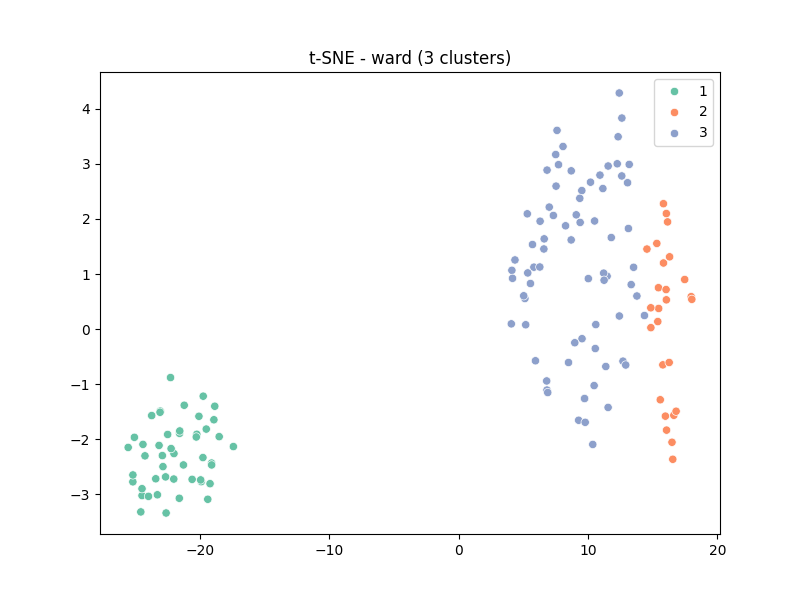

Mostrando: dendrograma_average_2.png


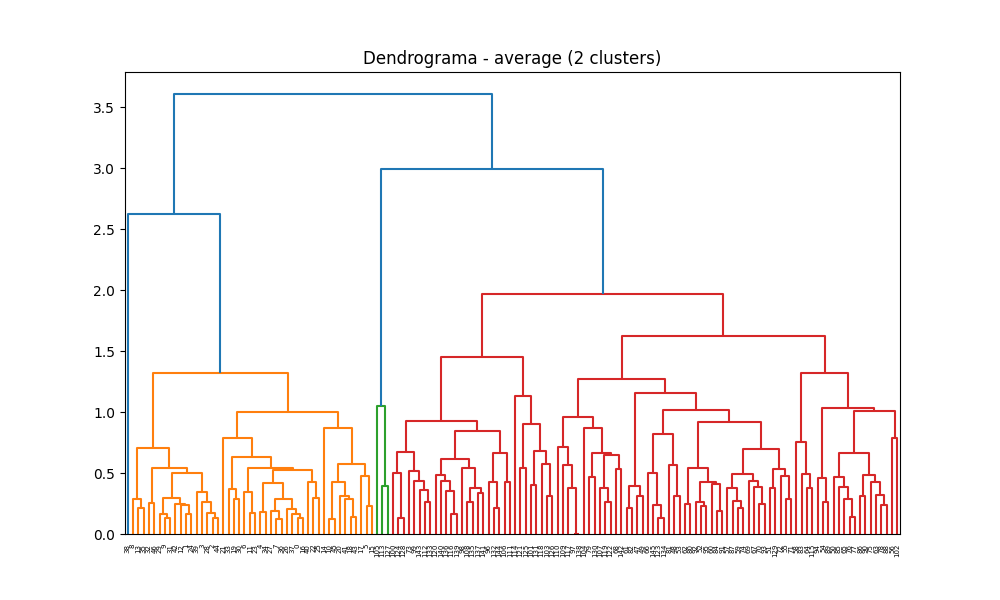

Mostrando: dendrograma_average_3.png


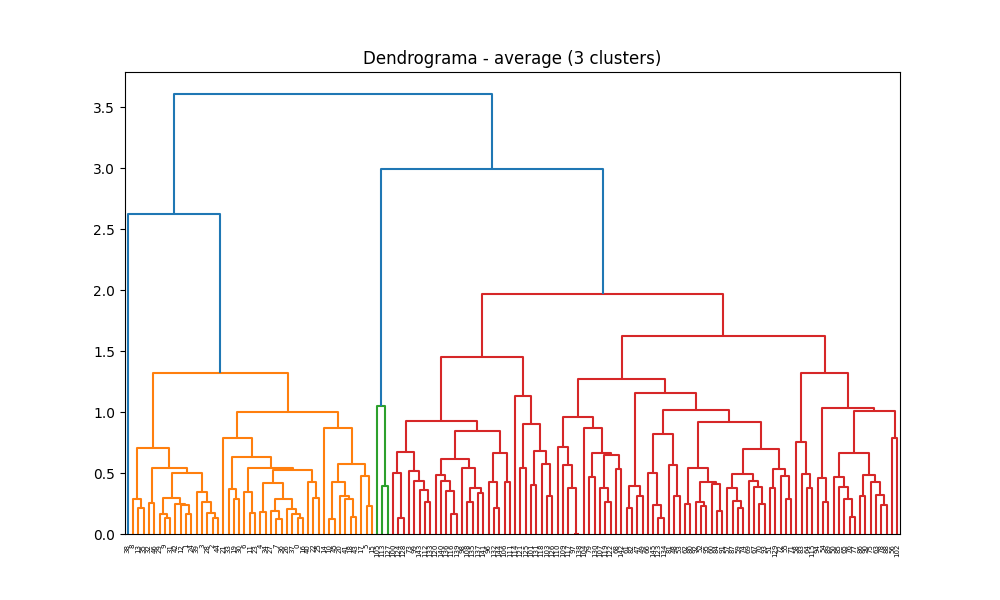

Mostrando: dendrograma_ward_2.png


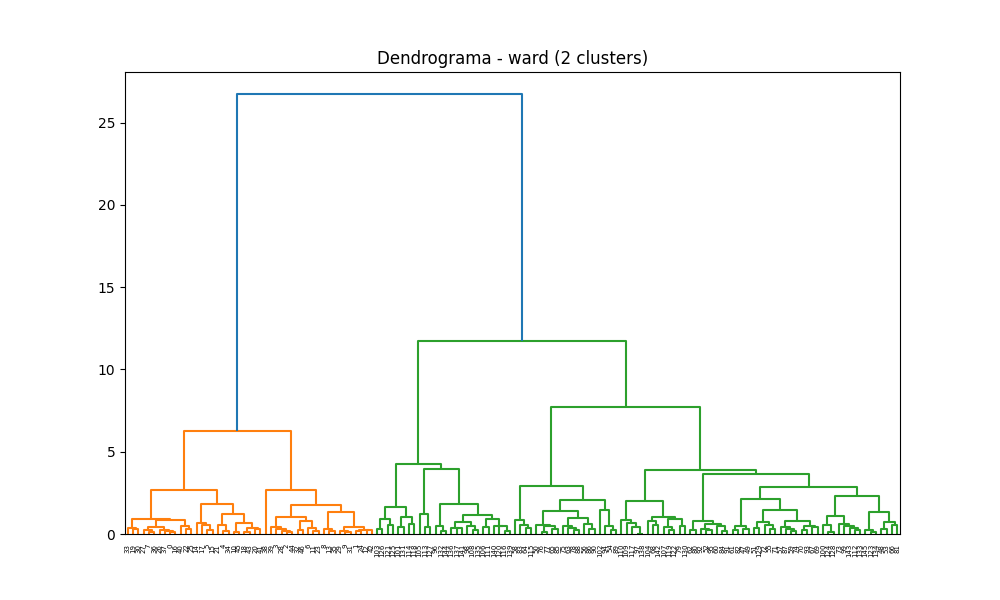

Mostrando: dendrograma_ward_3.png


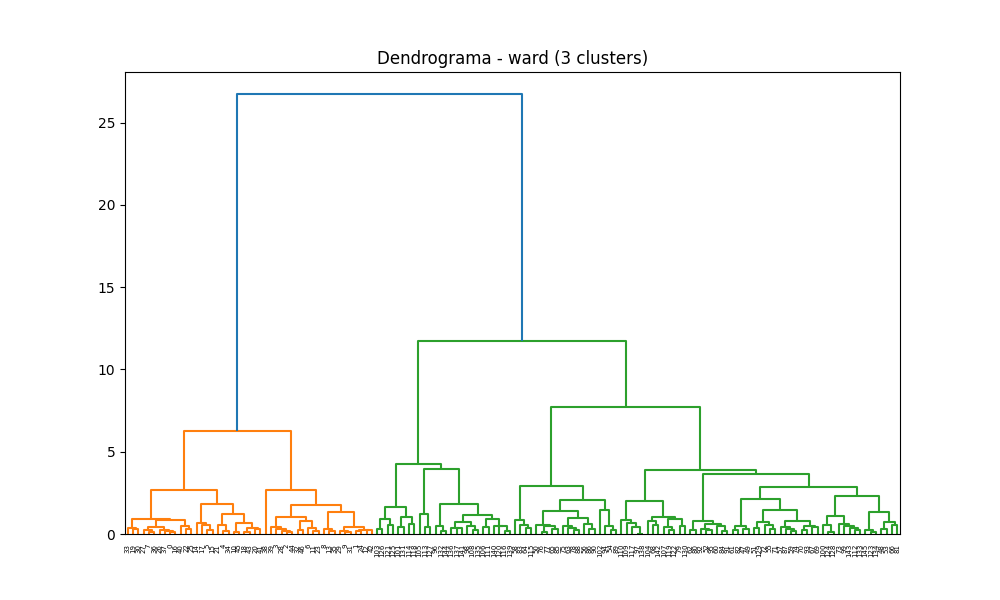

In [4]:

from IPython.display import Image, display
import os

# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
# Fijar el root del proyecto directamente
project_root = Path("/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase1MarcoParra")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


print("project_root:", project_root)

# Rutas a las imágenes generadas
output_dir = project_root / "outputs"
imagenes = [
    "pca_varianza_explicada.png",
    "pca_2d.png",
    "pca_3d.png",
    "tsne_average_2.png",
    "tsne_average_3.png",
    "tsne_ward_2.png",
    "tsne_ward_3.png",
    "dendrograma_average_2.png",
    "dendrograma_average_3.png",
    "dendrograma_ward_2.png",
    "dendrograma_ward_3.png"
]

for img in imagenes:
    path = output_dir / img
    if path.exists():
        print(f"Mostrando: {img}")
        display(Image(filename=str(path)))
    else:
        print(f"⚠️ Imagen no encontrada: {path}")



## 📌 Conclusiones

- El método **Ward** mostró clusters más equilibrados y compactos, 
  mientras que **Average** reflejó una estructura más dispersa.
- Con **PCA (2D y 3D)** se observa una separación clara de grupos principales, 
  aunque t-SNE ofrece mayor nitidez en las fronteras locales.
- **t-SNE** preserva relaciones locales entre los puntos, revelando agrupaciones 
  más evidentes aunque a costa de perder proporciones globales.
- El uso de dendrogramas permite observar jerarquías en la formación de clusters, 
  facilitando la elección del número óptimo de grupos.
